In [194]:
import matplotlib.pyplot as plt
import torch
from sklearn.externals import joblib
import numpy as np
from MTL_OPT.lib.evaluation import plot_best, plot_best_test

def plot_tracker(track, param_index):
    ntrack = len(track[param_index]['grad'])

    for i in range(ntrack):
        g = np.array(track[param_index]['grad'][i])
        plt.plot(g)
    plt.title('{} randomly tracked gradient over time'.format(ntrack))
    plt.show()

    for i in range(ntrack):
        g = np.array(track[param_index]['param'][i])
        plt.plot(g)
    plt.title('{} randomly tracked parameters over time'.format(ntrack))
    plt.show()

    for i in range(ntrack):
        p = np.array(track[param_index]['param'][i])
        diff = p[1:] - p[:-1]
        plt.semilogy(np.abs(diff)) # negative b/c gradient "descent"
    plt.title('step size')
    plt.show()

    for i in range(ntrack):
        p = np.array(track[param_index]['alpha_ratio'][i])
        #plt.semilogy(p)
        plt.plot(p)
    plt.title('alpha ratio (smaller uses more curvature)')
    plt.show()

    for i in range(ntrack):
        p = np.array(track[param_index]['feature_step'][i])
        plt.plot(p)
    plt.title('feature steps (# times cross 0)')
    plt.show()
    
    for i in range(ntrack):
        p = np.array(track[param_index]['lr'][i])
        plt.semilogy(p)
    plt.title('learning rate')
    plt.show()

# When to switch

Adam test: 162.924 val: 175.727 fn:/data2/jiaxuan/2019/pytorch_tutorial_fork/tutorials/02-intermediate/language_model_wiki/train_loss/Adam-0.001^-1.00^M4H1X.train_losses
CrossBound test: 196.418 val: 216.611 fn:/data2/jiaxuan/2019/pytorch_tutorial_fork/tutorials/02-intermediate/language_model_wiki/train_loss/CrossBound-1.0^-1.00^K6528.train_losses
SGD test: 201.904 val: 223.020 fn:/data2/jiaxuan/2019/pytorch_tutorial_fork/tutorials/02-intermediate/language_model_wiki/train_loss/SGD-1.0^-1.00^Q0DTE.train_losses


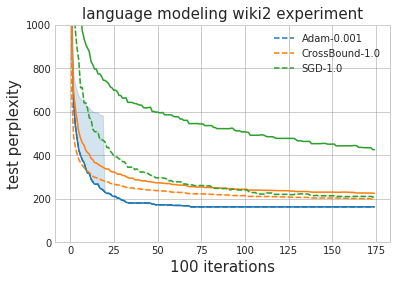

Adam: -1.00% (0.00) 3 runs
CrossBound: -1.00% (0.00) 3 runs
SGD: -1.00% (0.00) 3 runs


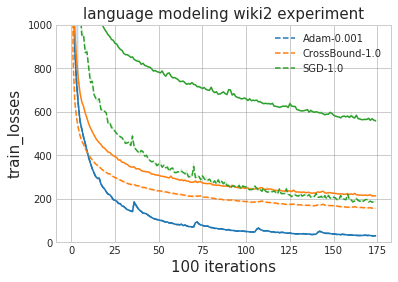

In [167]:
default_setting = {'AdaBound': '0.001',
 'Adam': '0.001',
 'CrossAdaBound': '0.001',
 'CrossBound': '0.001',
 'Diff': '0.001',
 'SGD': '0.1',
 'Swats': '0.001'}

methods = ['CrossBound', #'AdaBound', 
           'Swats', 
           'CrossAdaBound'
          ] # when to switch
methods = ['CrossBound', 'Adam', 'SGD']
plot_best_test('/data2/jiaxuan/2019/pytorch_tutorial_fork/tutorials/02-intermediate/language_model_wiki/train_loss/*train_losses', 
               title='language modeling wiki2 experiment', smooth_window=1, ylim=[0, 1000], methods=methods,
               start=-2, default_setting=default_setting,
               xlabel="100 iterations", ylabel="perplexity",
               early_stop=True, early_stop_patience=10)

plot_best('/data2/jiaxuan/2019/pytorch_tutorial_fork/tutorials/02-intermediate/language_model_wiki/train_loss/*train_losses', 
          title='language modeling wiki2 experiment', smooth_window=1, ylim=[0, 1000], methods=methods,
          xlabel="100 iterations", start=0, default_setting=default_setting)

#plot_tracker(joblib.load('/data2/jiaxuan/2019/pytorch_tutorial_fork/tutorials/02-intermediate/language_model_wiki/train_loss/CrossAdaBound-0.001^-1.00^8V3QC.opt_track'), 0)
#plot_tracker(joblib.load('/data2/jiaxuan/2019/pytorch_tutorial_fork/tutorials/02-intermediate/language_model_wiki/train_loss/Swats-0.001^-1.00^JW23S.opt_track'), 0)

Adam test: 0.016 val: 0.013 fn:/data2/jiaxuan/2019/pytorch_tutorial_fork/tutorials/02-intermediate/bidirectional_recurrent_neural_network/train_loss/Adam-0.001^98.50^B7RZJ.train_losses
CrossBound test: 0.013 val: 0.013 fn:/data2/jiaxuan/2019/pytorch_tutorial_fork/tutorials/02-intermediate/bidirectional_recurrent_neural_network/train_loss/CrossBound-0.01^98.63^UH7IV.train_losses
SGD test: 0.014 val: 0.012 fn:/data2/jiaxuan/2019/pytorch_tutorial_fork/tutorials/02-intermediate/bidirectional_recurrent_neural_network/train_loss/SGD-1.0^98.56^7O41Z.train_losses


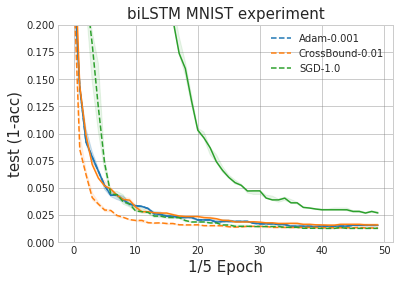

Adam: 98.07% (0.30) 3 runs
CrossBound: 98.65% (0.03) 3 runs
SGD: 98.68% (0.09) 3 runs


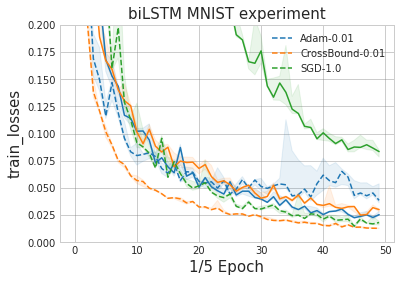

In [168]:
default_setting = {'AdaBound': '0.001',
 'Adam': '0.001',
 'CrossAdaBound': '0.001',
 'CrossBound': '0.001',
 'Diff': '0.001',
 'SGD': '0.1',
 'Swats': '0.001'}
methods = ['CrossBound', #'AdaBound', 
           'Swats', 
           'CrossAdaBound'
          ] # when to switch
methods = ['CrossBound', 'Adam', 'SGD']

plot_best_test('/data2/jiaxuan/2019/pytorch_tutorial_fork/tutorials/02-intermediate/bidirectional_recurrent_neural_network/train_loss/*train_losses', 
               title='biLSTM MNIST experiment', smooth_window=1, ylim=[0, 0.2], methods=methods,
               start=-2, default_setting=default_setting,
               xlabel="1/5 Epoch", ylabel="(1-acc)",
               early_stop=True, early_stop_patience=10)

plot_best('/data2/jiaxuan/2019/pytorch_tutorial_fork/tutorials/02-intermediate/bidirectional_recurrent_neural_network/train_loss/*train_losses', 
          title='biLSTM MNIST experiment', smooth_window=1, ylim=[0,0.2], methods=methods,
          xlabel="1/5 Epoch", start=0, default_setting=default_setting)

#plot_tracker(joblib.load('/data2/jiaxuan/2019/pytorch_tutorial_fork/tutorials/02-intermediate/deep_residual_network/train_loss/Swats-0.001^87.11^AJY8K.opt_track'), 0)

Adam test: 0.011 val: 0.011 fn:/data2/jiaxuan/2019/pytorch_tutorial_fork/tutorials/01-basics/emnist/train_loss/Adam-0.0001^98.91^RMZOW.train_losses
CrossBound test: 0.010 val: 0.009 fn:/data2/jiaxuan/2019/pytorch_tutorial_fork/tutorials/01-basics/emnist/train_loss/CrossBound-1e-05^98.89^6XCT9.train_losses
SGD test: 0.011 val: 0.010 fn:/data2/jiaxuan/2019/pytorch_tutorial_fork/tutorials/01-basics/emnist/train_loss/SGD-0.1^98.99^VZUWV.train_losses


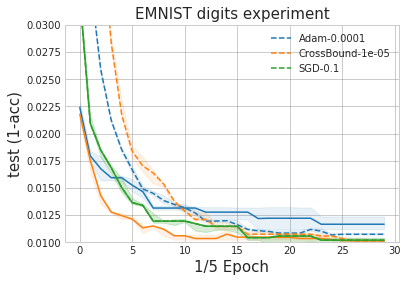

Adam: 98.91% (0.06) 4 runs
CrossBound: 98.98% (0.03) 5 runs
SGD: 98.95% (0.08) 3 runs


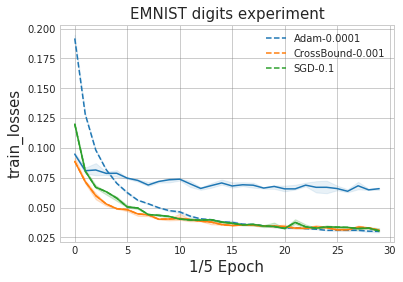

In [169]:
default_setting = {'AdaBound': '0.001',
 'Adam': '0.001',
 'CrossAdaBound': '0.001',
 'CrossBound': '0.001',
 'Diff': '0.001',
 'SGD': '0.1',
 'Swats': '0.001'}

methods = ['CrossBound', #'AdaBound', 
           'Swats', 
           'CrossAdaBound'
          ] # when to switch
#methods = ['Diff', 'Adam']
methods = ['CrossBound', 'Adam', 'SGD']

plot_best_test('/data2/jiaxuan/2019/pytorch_tutorial_fork/tutorials/01-basics/emnist/train_loss/*train_losses', 
               title='EMNIST digits experiment', smooth_window=1, ylim=[0.01,0.03], methods=methods,
               start=-2, default_setting=default_setting,
               ylabel="(1-acc)", xlabel="1/5 Epoch",
               early_stop=True, early_stop_patience=10)

plot_best('/data2/jiaxuan/2019/pytorch_tutorial_fork/tutorials/01-basics/emnist/train_loss/*train_losses', 
          title='EMNIST digits experiment', smooth_window=1, ylim=None, methods=methods,
          xlabel="1/5 Epoch",
          start=0, default_setting=default_setting)
# plot_tracker(joblib.load('/data2/jiaxuan/2019/pytorch_tutorial_fork/tutorials/02-intermediate/deep_residual_network/train_loss/CrossBound-0.001^87.84^U1HT4.opt_track'), 0)

Adam test: 0.119 val: 0.108 fn:/data2/jiaxuan/2019/pytorch_tutorial_fork/tutorials/02-intermediate/deep_residual_network/train_loss/Adam-0.001^88.31^ACK1H.train_losses
CrossBound test: 0.113 val: 0.107 fn:/data2/jiaxuan/2019/pytorch_tutorial_fork/tutorials/02-intermediate/deep_residual_network/train_loss/CrossBound-0.001^88.94^YPIKY.train_losses
SGD test: 0.108 val: 0.103 fn:/data2/jiaxuan/2019/pytorch_tutorial_fork/tutorials/02-intermediate/deep_residual_network/train_loss/SGD-1.0^89.33^JEJJJ.train_losses


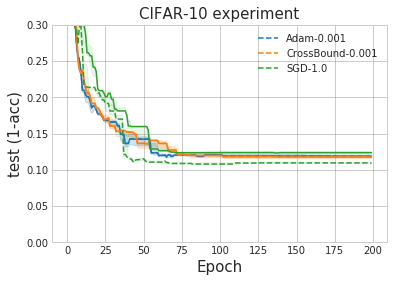

Adam: 87.99% (0.23) 3 runs
CrossBound: 88.37% (0.45) 3 runs
SGD: 89.12% (0.16) 3 runs


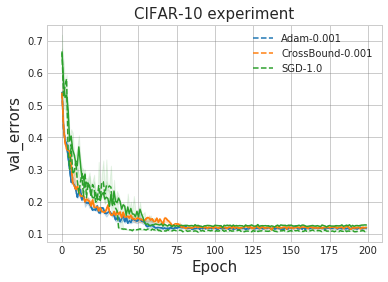

In [173]:
default_setting = {'AdaBound': '0.001',
 'Adam': '0.001',
 'CrossAdaBound': '0.001',
 'CrossBound': '0.001',
 'Diff': '0.001',
 'SGD': '0.1',
 'Swats': '0.001'}
methods = ['CrossBound', #'AdaBound',
           'Swats', 
           'CrossAdaBound'
          ] # when to switch

methods = ['CrossBound', 'Adam', 'SGD']

plot_best_test('/data2/jiaxuan/2019/pytorch_tutorial_fork/tutorials/02-intermediate/deep_residual_network/train_loss/*train_losses', 
               title='CIFAR-10 experiment', smooth_window=1, ylim=[0, 0.3], methods=methods,
               ylabel="(1-acc)",
               start=-2, default_setting=default_setting,
               early_stop=True, early_stop_patience=10)

plot_best('/data2/jiaxuan/2019/pytorch_tutorial_fork/tutorials/02-intermediate/deep_residual_network/train_loss/*val_errors', 
               title='CIFAR-10 experiment', smooth_window=1, ylim=None, methods=methods,
               start=0, default_setting=default_setting)

# plot_tracker(joblib.load('/data2/jiaxuan/2019/pytorch_tutorial_fork/tutorials/02-intermediate/deep_residual_network/train_loss/CrossBound-0.001^87.84^U1HT4.opt_track'), 0)

Adam test: 0.855 val: -0.858 fn:../MTL_RNN/mimic3/IHM/train_loss_opt/Adam-0.001-0.3-32-2-100^-1.00^3HBFQ.train_losses
CrossBound test: 0.855 val: -0.857 fn:../MTL_RNN/mimic3/IHM/train_loss_opt/CrossBound-0.01-0.3-32-2-100^-1.00^5WMV0.train_losses
SGD test: 0.841 val: -0.849 fn:../MTL_RNN/mimic3/IHM/train_loss_opt/SGD-1.0-0.3-32-2-100^-1.00^G5410.train_losses


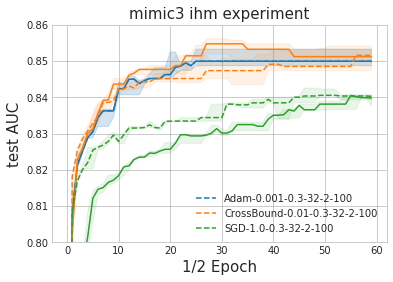

Adam: -1.00% (0.00) 5 runs
CrossBound: -1.00% (0.00) 5 runs
SGD: -1.00% (0.00) 5 runs


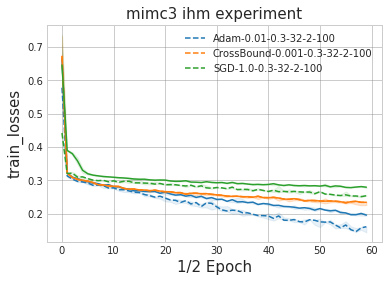

In [174]:
default_setting = {
    'AdaBound': '0.001-0.3-32-2-100',
    'Adam': '0.001-0.3-32-2-100',
    'CrossAdaBound': '0.001-0.3-32-2-100',
    'CrossBound': '0.001-0.3-32-2-100',
    'Diff': '0.001-0.3-32-2-100',
    'SGD': '0.1-0.3-32-2-100',
    'Swats': '0.001-0.3-32-2-100'
}

methods = ['CrossBound', #'AdaBound', 
           'Swats', 
           'CrossAdaBound'
          ] # when to switch
methods = ['CrossBound', 'Adam', 'SGD']

plot_best_test('../MTL_RNN/mimic3/IHM/train_loss_opt/*train_losses', 
               title='mimic3 ihm experiment', smooth_window=1, ylim=[0.8, 0.86], q_low=25, q_high=75,
               methods=methods, start=-2, default_setting=default_setting, ylabel='AUC',
               xlabel="1/2 Epoch",
               early_stop=True, early_stop_patience=None)

plot_best('../MTL_RNN/mimic3/IHM/train_loss_opt/*train_losses', 
          title='mimc3 ihm experiment', smooth_window=1, ylim=None, methods=methods,  
          xlabel="1/2 Epoch",
          start=0, default_setting=default_setting)

#plot_tracker(joblib.load('/data2/jiaxuan/2019/pytorch_tutorial_fork/tutorials/02-intermediate/language_model_wiki/train_loss/CrossAdaBound-0.001^-1.00^8V3QC.opt_track'), 0)
#plot_tracker(joblib.load('/data2/jiaxuan/2019/pytorch_tutorial_fork/tutorials/02-intermediate/language_model_wiki/train_loss/Swats-0.001^-1.00^JW23S.opt_track'), 0)

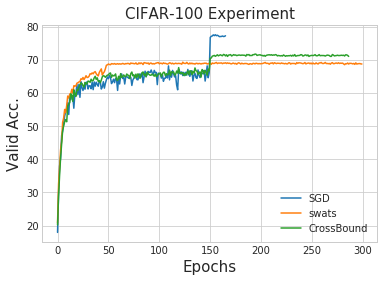

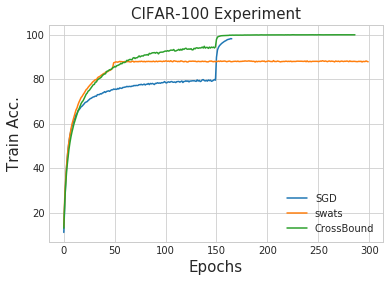

In [179]:
# plot cifar 100
def load_log(path):
    with open(path) as fn:
        lines = fn.readlines()
        headers, rest = lines[0].rstrip().split('\t'), lines[1:]
        res = dict((h, []) for h in headers)
        for l in rest:
            for h, v in zip(headers, map(float, l.rstrip().split('\t'))):
                res[h].append(v)
    return res

# dict_keys(['Valid Loss', 'Valid Acc.', 'Train Acc.', 'Train Loss', 'Learning Rate'])

def plot_cifar(data_paths, key='Valid Acc.', title=None, ylabel=None):
    for p in data_paths:
        log = load_log(p)
        plt.plot(log[key], label=p.split('/')[-2].split('-')[-1])

    title = title or "CIFAR-100 Experiment"
    ylabel = ylabel or key
    plt.title(title, fontsize=15)
    plt.ylabel(ylabel, fontsize=15)
    plt.legend()
    plt.xlabel('Epochs', fontsize=15)
    plt.show()
    
data_paths = [
    '../cifar100/checkpoints/cifar100/densenet-bc-100-12-SGD/log.txt',
    '../cifar100/checkpoints/cifar100/densenet-bc-100-12-swats/log.txt',
    #'../cifar100/checkpoints/cifar100/densenet-bc-100-12-AdaBound/log.txt',
    #'../cifar100/checkpoints/cifar100/densenet-bc-100-12-CrossAdaBound/log.txt',
    '../cifar100/checkpoints/cifar100/densenet-bc-100-12-CrossBound/log.txt', 
    #'../cifar100/checkpoints/cifar100/densenet-bc-100-12-Adam/log.txt', 
              ]
plot_cifar(data_paths)
plot_cifar(data_paths, key='Train Acc.')

#plot_tracker(joblib.load('../cifar100/checkpoints/cifar100/densenet-bc-100-12-swats/opt_track.pkl'), 0)
#plot_tracker(joblib.load('../cifar100/checkpoints/cifar100/densenet-bc-100-12-AdaBound/opt_track.pkl'), 0)

CrossBound


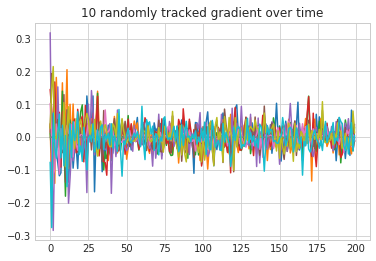

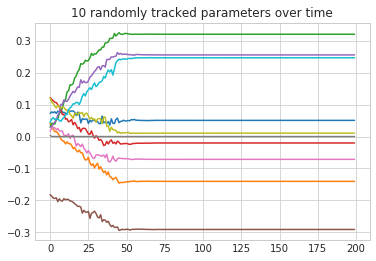

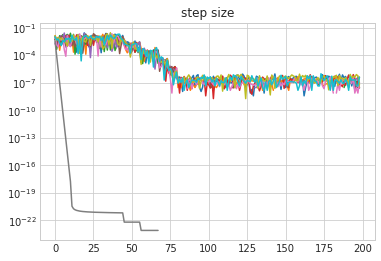

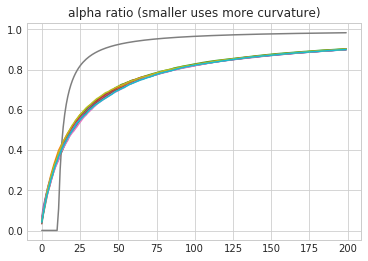

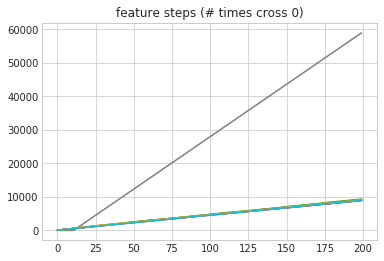

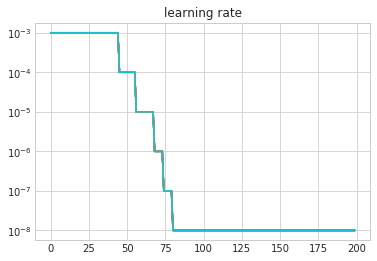

AdaBound


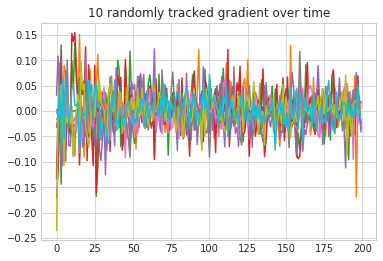

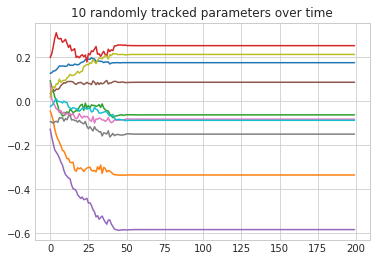

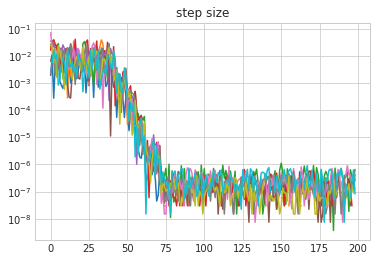

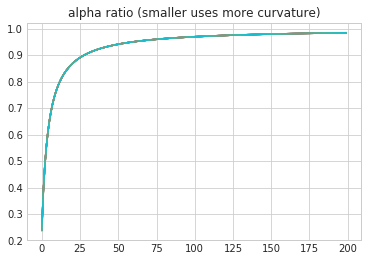

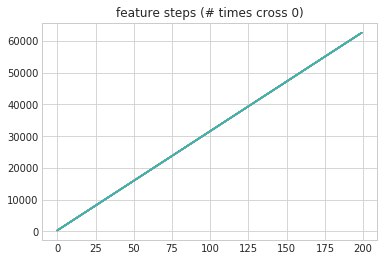

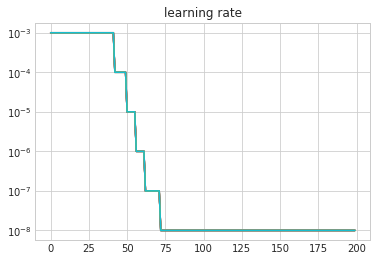

Swats


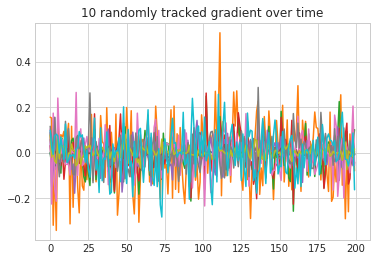

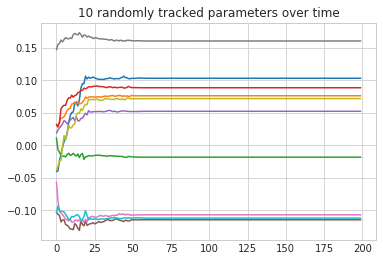

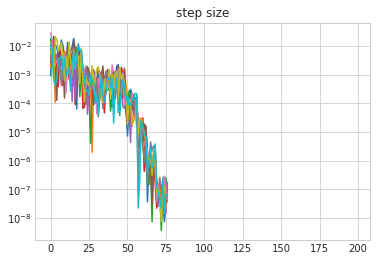

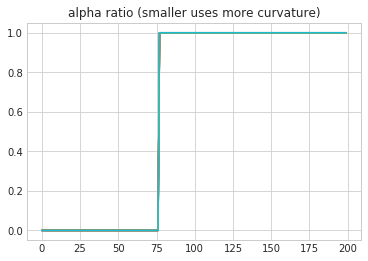

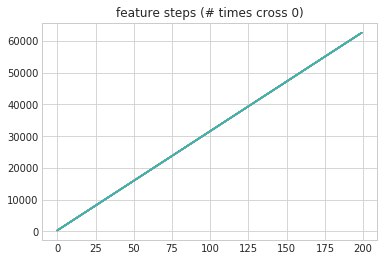

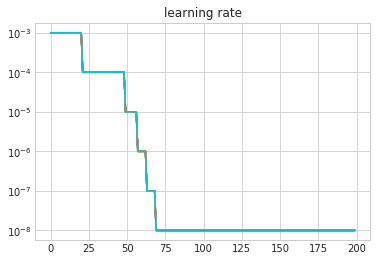

In [195]:
print('CrossBound')
plot_tracker(joblib.load('/data2/jiaxuan/2019/pytorch_tutorial_fork/tutorials/02-intermediate/deep_residual_network/train_loss/CrossBound-0.001^87.84^U1HT4.opt_track'), 0)
print('AdaBound')
plot_tracker(joblib.load('/data2/jiaxuan/2019/pytorch_tutorial_fork/tutorials/02-intermediate/deep_residual_network/train_loss/AdaBound-0.001^87.58^K5KXX.opt_track'), 0)
print('Swats')
plot_tracker(joblib.load('/data2/jiaxuan/2019/pytorch_tutorial_fork/tutorials/02-intermediate/deep_residual_network/train_loss/Swats-0.001^87.11^AJY8K.opt_track'), 0)

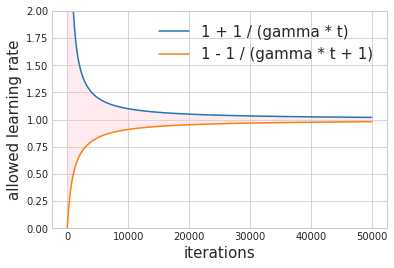

In [207]:
def upper_bound(t, gamma=1e-3):
    return 1 + 1/ (gamma * t)

def lower_bound(t, gamma=1e-3):
    return 1 - 1/ (gamma * t + 1)

t = np.arange(1,50000)
u = upper_bound(t)
l = lower_bound(t)
plt.plot(u, label="1 + 1 / (gamma * t)")
plt.plot(l, label="1 - 1 / (gamma * t + 1)")
plt.legend(fontsize=15)
plt.ylabel('allowed learning rate', fontsize=15)
plt.xlabel('iterations', fontsize=15)
plt.fill_between(t, l, u, color='pink', alpha=0.3)
plt.ylim([0,2])
plt.show()
